In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'Zoo.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [2]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [3]:
df.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [12]:
from sklearn.model_selection import train_test_split

# Assuming 'type' is the target variable
X = df.drop(['type', 'animal name'], axis=1)  # Drop the target and non-predictive features
y = df['type']


In [13]:
# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print(X_train.shape, X_test.shape)

(80, 16) (21, 16)


In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Start with K=5, you can tune this later

# Train the model on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
# Re-train the model if you change the parameters
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Predict on the test data
y_pred = knn.predict(X_test)


In [18]:

# Calculate and print the evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))


Accuracy: 0.9047619047619048
Precision: 0.9047619047619048
Recall: 0.9047619047619048
F1-Score: 0.8957902001380263


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.90        21
   macro avg       0.75      0.82      0.77        21
weighted avg       0.90      0.90      0.90        21

Confusion Matrix:
 [[11  0  0  1  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The model achieved an accuracy of approximately 90.48% on the test set, indicating that 90.48% of the predictions made by the KNN classifier were correct.

Class 1: The model performed excellently with a precision of 1.00, recall of 0.92, and an F1-score of 0.96.

Class 2: Perfect performance with precision, recall, and F1-score all at 1.00. Both instances were correctly classified.

Class 3: The model struggled with Class 3, with no correct classifications (precision, recall, and F1-score of 0.00). The single instance was misclassified as Class 4.


Class 4: The classifier correctly identified both instances of Class 4, resulting in a recall of 1.00

Class 6 and Class 7: The model perfectly classified instances in these classes, with precision, recall, and F1-scores all at 1.00.

The model performs strongly for most classes, especially Classes 1, 2, 6, and 7, where it shows high precision and recall.
Weaknesses: The classifier struggles with Class 3, where it failed to correctly identify the sample. This could be due to the small number of samples in some classes or the need to fine-tune the value of K or the distance metric.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Select two features for visualization
X_vis = X_train[['hair', 'milk']].values
y_vis = y_train.values


In [21]:
# Train KNN on these two features
knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_vis, y_vis)

# Create a mesh grid for plotting
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))


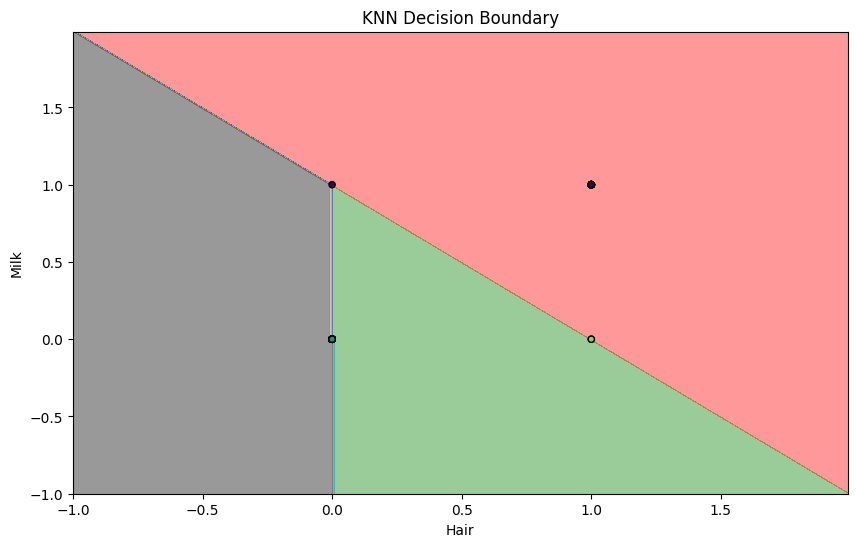

In [22]:
# Predict the classification for each point in the grid
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black')))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, s=20, edgecolor='k')
plt.title('KNN Decision Boundary')
plt.xlabel('Hair')
plt.ylabel('Milk')
plt.show()

The key hyperparameters in the K-Nearest Neighbors (KNN) algorithm are:

n_neighbors (K): This determines the number of neighbors to consider when making a classification decision. A smaller K means the model is more sensitive to noise, while a larger K smooths out predictions but might overlook local patterns.

metric: This specifies the distance metric used to calculate the distance between data points. Common metrics include:

Euclidean Distance: The default metric, which calculates the straight-line distance between points.
Manhattan Distance: Also known as L1 distance, it sums the absolute differences between coordinates.
Minkowski Distance: A generalization of Euclidean and Manhattan distances, controlled by the p parameter.
p (for Minkowski Distance): This parameter defines the power parameter for the Minkowski metric:

p = 1 is equivalent to Manhattan distance.
p = 2 is equivalent to Euclidean distance.
weights: This determines how the neighbors are weighted when making predictions:

Uniform: All neighbors are weighted equally.
Distance: Closer neighbors have a higher influence on the prediction.
algorithm: This determines the method used to compute the nearest neighbors:

auto: Automatically selects the best algorithm based on the data.
ball_tree and kd_tree: Efficient for high-dimensional data.
brute: Computes distances for all points, which can be slower.

In K-Nearest Neighbors (KNN), several distance metrics can be used to calculate the "closeness" between data points. The choice of distance metric can significantly affect the performance of the KNN algorithm. Here are the most commonly used distance metrics:

Euclidean Distance:

The most common and default distance metric in KNN.
It is the straight-line distance between two points in Euclidean space.

2 Manhattan Distance (also known as L1 Distance or City Block Distance):

Measures the distance between two points by summing the absolute differences of their coordinates.

Minkowski Distance:

A generalization of both Euclidean and Manhattan distances.

Chebyshev Distance:

Also known as maximum distance or L∞ norm.
It measures the greatest difference along any coordinate dimension.

Cosine Similarity:

Measures the cosine of the angle between two non-zero vectors.
It is often used in text classification and other high-dimensional spaces.
Cosine similarity itself is not a distance, but 1 - cosine similarity can be used as a distance measure.

Mahalanobis Distance:

A distance metric that accounts for correlations between variables.
Useful in situations where the data distribution is not uniform and variables are correlated.
Requires the computation of the covariance matrix of the data.

Hamming Distance:

Measures the distance between two binary strings by counting the number of bit positions in which the two bits are different.
Often used for categorical data.
Jaccard Distance:

Measures the dissimilarity between two sets.
Commonly used for binary or categorical data.

